In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]

df = pd.read_csv("car_price_data.csv",usecols=cols)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
df.isnull().sum() 

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [6]:
df.fillna(value=0,inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [7]:
df.rename(columns={"msrp":"price"},inplace=True)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Q1: What is the most frequent observation (mode) for the column transmission_type?

In [8]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [9]:
df['transmission_type'].value_counts().idxmax()

'AUTOMATIC'

In [10]:
mode_transmission_type = df['transmission_type'].mode()
mode_transmission_type[0]

'AUTOMATIC'

# Q2
## What are the two features that have the biggest correlation in this dataset?

In [11]:
numerical = ["year","engine_hp","engine_cylinders","highway_mpg","city_mpg","price"]

In [12]:
df_numerical = df[numerical]
df_numerical

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [13]:
correlation_matrix = df_numerical.corr()
correlation_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


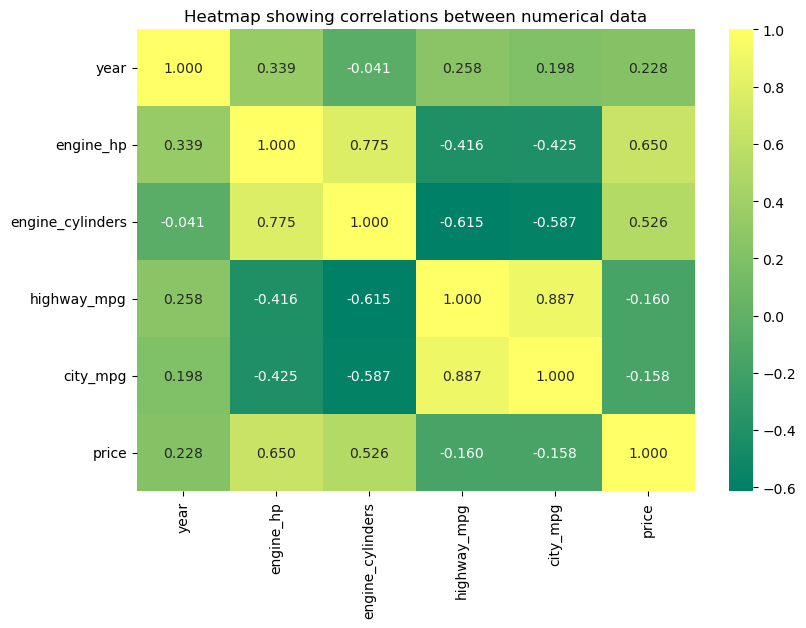

In [14]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_numerical.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [15]:
df_numerical.corr().unstack().sort_values(ascending = False)

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
year              price               0.227590
price             year                0.227590
year              city_mpg            0.198171
city_mpg     

## Make price binary

In [16]:
above_average = df_numerical.price.mean()
above_average

40594.737032063116

In [17]:
#df_numerical["price"] = (df_numerical["price"] > above_average).astype(int)
#df_numerical

In [18]:
data_class = df.copy()
mean = data_class['price'].mean()
data_class['above_average'] = np.where(data_class['price']>=mean,1,0)
data_class = data_class.drop(['price'], axis=1)
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


## Split the data

In [19]:
from sklearn.model_selection import train_test_split

df_full_train,df_test = train_test_split(data_class,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [20]:
(len(data_class) == (len(df_train) + len(df_val) + len(df_test))) & (len(df_train) + len(df_val) == len(df_full_train))

True

In [21]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values
y_full_train = df_full_train.above_average.values

In [22]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


# Q3
## Which of these variables has the lowest mutual information score?

In [23]:
from sklearn.metrics import mutual_info_score

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

def mutual_info_above_average_score(series):
    return mutual_info_score(series,df_train.above_average)

mi = df_train[categorical].apply(mutual_info_above_average_score).sort_values(ascending=False)
mi

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

In [24]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

# Q4

In [25]:
df_train.nunique()

make                  48
model                869
year                  28
engine_hp            339
engine_cylinders       9
transmission_type      5
vehicle_style         16
highway_mpg           55
city_mpg              62
dtype: int64

In [26]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [27]:
categorical = ["make","model","transmission_type","vehicle_style"]
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [28]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [29]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [30]:
dict_train = df_train.to_dict(orient="records")
dict_train[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [31]:
X_train = dv.fit_transform(dict_train)

In [32]:
dict_val = df_val.to_dict(orient="records")
X_val = dv.transform(dict_val)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [34]:
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [35]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([3.07033780e-04, 9.97720253e-01, 6.97938861e-05, ...,
       1.01043039e-04, 9.91013704e-01, 9.90912809e-01])

In [36]:
temp = (y_pred >= 0.5)
accuracy = (y_val == temp).mean()
accuracy.round(2)

0.95

# Q5

In [37]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
feature_list = list(df_train.columns)
from sklearn.metrics import accuracy_score

In [38]:
for feature in feature_list:
    
    temp = feature_list.copy()
    temp.remove(feature)
    
    dict_train = df_train[temp].to_dict(orient="records")
    dict_val = df_val[temp].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dict_train)
    X_val = dv.transform(dict_val)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, accuracy - score]
    

In [39]:
scores

,eliminated_feature,accuracy,difference
0,make,0.949224,-0.002937
1,model,0.924045,0.022241
2,year,0.947965,-0.001679
3,engine_hp,0.930340,0.015946
4,engine_cylinders,0.947125,-0.000839
5,transmission_type,0.945027,0.001259
6,vehicle_style,0.942509,0.003777
7,highway_mpg,0.944188,0.002098
8,city_mpg,0.945867,0.000420


In [40]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
0,make,0.949224,-0.002937


# Q6

In [44]:
df.price = df.price.apply(np.log1p)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.739024
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.945018
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.832122
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.838031


In [45]:
from sklearn.linear_model import Ridge

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

df_train.drop('price', axis=1,inplace=True)
df_val.drop('price', axis=1,inplace=True)
df_test.drop('price', axis=1,inplace=True)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [46]:
from sklearn.metrics import mean_squared_error

scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = score.round(3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0:	 RMSE = 0.48679431324238925


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.01:	 RMSE = 0.48679455192752635


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.1:	 RMSE = 0.48679670001899783


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 1:	 RMSE = 0.4868181745432734
alpha = 10:	 RMSE = 0.48703228329751214


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 0.


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_val= scaler.transform(X_val)


scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = score.round(3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0:	 RMSE = 0.2386910519441039


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.01:	 RMSE = 0.23868636436310078


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.1:	 RMSE = 0.2386443421878796


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 1:	 RMSE = 0.23824011332421685
alpha = 10:	 RMSE = 0.23501080565408175


In [49]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 10.
